In [49]:
# !pip install wordcloud
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 6.6 MB/s eta 0:00:00


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import string
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/content/Dataset_10k.csv")
df.head()

,Unnamed: 0,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category
0,0,2024-10-14,"will.i.am and Fyilicia on the AI revolution, i...",Evening Standard,122,20,Monday,October,2024,4,False,Other
1,1,2024-02-21,Intel Launches World’s First Systems Foundry D...,Investor Relations :: Intel Corporation (INTC),117,18,Wednesday,February,2024,1,False,Other
2,2,2024-02-05,The Unique Challenges of Selling Enterprise AI,Emerge,54,9,Monday,February,2024,1,False,Career
3,3,2024-08-28,Contentious California AI bill passes legislat...,Reuters,88,11,Wednesday,August,2024,3,False,Other
4,4,2024-10-15,"Exploring Genius, Creation, and Humanity in th...",University of Aberdeen,82,14,Tuesday,October,2024,4,False,Other


In [6]:
df.describe()

,Unnamed: 0,number_of_characters_title,number_of_words_title,year,quarter
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,86.628500,13.863600,2023.917500,2.795500
std,2886.89568,25.763782,3.762713,0.275139,1.102543
min,0.00000,14.000000,3.000000,2023.000000,1.000000
25%,2499.75000,70.000000,11.000000,2024.000000,2.000000
50%,4999.50000,83.000000,13.000000,2024.000000,3.000000
75%,7499.25000,100.000000,16.000000,2024.000000,4.000000
max,9999.00000,285.000000,43.000000,2024.000000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  10000 non-null  int64 
 1   date                        10000 non-null  object
 2   title                       10000 non-null  object
 3   source                      10000 non-null  object
 4   number_of_characters_title  10000 non-null  int64 
 5   number_of_words_title       10000 non-null  int64 
 6   day_of_week                 10000 non-null  object
 7   month                       10000 non-null  object
 8   year                        10000 non-null  int64 
 9   quarter                     10000 non-null  int64 
 10  is_weekend                  10000 non-null  bool  
 11  category                    10000 non-null  object
dtypes: bool(1), int64(5), object(6)
memory usage: 869.3+ KB


In [8]:
df['source'].unique()

array(['Evening Standard',
       'Investor Relations :: Intel Corporation (INTC)', 'Emerge', ...,
       'CityNews Montreal', 'Economic Times',
       'Rochester Business Journal'], dtype=object)

# Data Preprocessing

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

In [10]:
df['source'] = df['source'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')
df['month'] = df['month'].astype('category')

In [11]:
df.head()

,Unnamed: 0,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category
0,0,2024-10-14,"will.i.am and Fyilicia on the AI revolution, i...",Evening Standard,122,20,Monday,October,2024,4,False,Other
1,1,2024-02-21,Intel Launches World’s First Systems Foundry D...,Investor Relations :: Intel Corporation (INTC),117,18,Wednesday,February,2024,1,False,Other
2,2,2024-02-05,The Unique Challenges of Selling Enterprise AI,Emerge,54,9,Monday,February,2024,1,False,Career
3,3,2024-08-28,Contentious California AI bill passes legislat...,Reuters,88,11,Wednesday,August,2024,3,False,Other
4,4,2024-10-15,"Exploring Genius, Creation, and Humanity in th...",University of Aberdeen,82,14,Tuesday,October,2024,4,False,Other


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  10000 non-null  int64         
 1   date                        10000 non-null  datetime64[ns]
 2   title                       10000 non-null  object        
 3   source                      10000 non-null  category      
 4   number_of_characters_title  10000 non-null  int64         
 5   number_of_words_title       10000 non-null  int64         
 6   day_of_week                 10000 non-null  category      
 7   month                       10000 non-null  category      
 8   year                        10000 non-null  int64         
 9   quarter                     10000 non-null  int64         
 10  is_weekend                  10000 non-null  bool          
 11  category                    10000 non-null  object     

In [13]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  text = text.lower()

  translation_table = str.maketrans("", "", string.punctuation)
  text = text.translate(translation_table)

  tokens = text.split()
  tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
  text = ' '.join(tokens)
  return text

In [15]:
df['title'] = df['title'].apply(preprocess_text)
df.head()

,Unnamed: 0,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category
0,0,2024-10-14,william fyilicia ai revolution inclusivity voi...,Evening Standard,122,20,Monday,October,2024,4,False,Other
1,1,2024-02-21,intel launch world’s first system foundry desi...,Investor Relations :: Intel Corporation (INTC),117,18,Wednesday,February,2024,1,False,Other
2,2,2024-02-05,unique challenge selling enterprise ai,Emerge,54,9,Monday,February,2024,1,False,Career
3,3,2024-08-28,contentious california ai bill pass legislatur...,Reuters,88,11,Wednesday,August,2024,3,False,Other
4,4,2024-10-15,exploring genius creation humanity age ai,University of Aberdeen,82,14,Tuesday,October,2024,4,False,Other


# Named Entity Recognition

In [16]:
nlp = spacy.load("en_core_web_sm")
def extract_named_entities(text):
  doc = nlp(text)
  return [(ent.text, ent.label_) for ent in doc.ents]

In [17]:
df['named_entities'] = df['title'].apply(extract_named_entities)
df.head()

,Unnamed: 0,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category,named_entities
0,0,2024-10-14,william fyilicia ai revolution inclusivity voi...,Evening Standard,122,20,Monday,October,2024,4,False,Other,"[(william fyilicia, PERSON), (daily, DATE)]"
1,1,2024-02-21,intel launch world’s first system foundry desi...,Investor Relations :: Intel Corporation (INTC),117,18,Wednesday,February,2024,1,False,Other,"[(intel, ORG), (first, ORDINAL)]"
2,2,2024-02-05,unique challenge selling enterprise ai,Emerge,54,9,Monday,February,2024,1,False,Career,[]
3,3,2024-08-28,contentious california ai bill pass legislatur...,Reuters,88,11,Wednesday,August,2024,3,False,Other,"[(california, GPE)]"
4,4,2024-10-15,exploring genius creation humanity age ai,University of Aberdeen,82,14,Tuesday,October,2024,4,False,Other,[]


In [18]:
all_entities = []

for sublist in df['named_entities']:
  for ent in sublist:
    all_entities.append(ent[1])

print(Counter(all_entities))

Counter({'ORG': 1528, 'CARDINAL': 1235, 'PERSON': 741, 'GPE': 689, 'DATE': 682, 'NORP': 252, 'ORDINAL': 193, 'LOC': 81, 'MONEY': 61, 'QUANTITY': 26, 'TIME': 16, 'PRODUCT': 12, 'PERCENT': 9, 'WORK_OF_ART': 5, 'EVENT': 5, 'LANGUAGE': 5, 'FAC': 3, 'LAW': 2})


# Exploratory Data Analysis

In [19]:
df['source'].value_counts()

,count
source,
Forbes,206
Nature.com,194
The Motley Fool,174
TechCrunch,168
Reuters,159
...,...
Investment Executive,1
Investment Magazine,1
InvestorPlace,1


In [20]:
df['source'].value_counts().head(10)

,count
source,
Forbes,206
Nature.com,194
The Motley Fool,174
TechCrunch,168
Reuters,159
The Verge,122
Financial Times,120
Microsoft,116
The Guardian,108


In [21]:
top_10_sources = df['source'].value_counts().head(10).index.tolist()
top_10_sources

['Forbes',
 'Nature.com',
 'The Motley Fool',
 'TechCrunch',
 'Reuters',
 'The Verge',
 'Financial Times',
 'Microsoft',
 'The Guardian',
 'Yahoo Finance']

In [22]:
top_10_df = df[df['source'].isin(top_10_sources)]
top_10_df

,Unnamed: 0,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category,named_entities
3,3,2024-08-28,contentious california ai bill pass legislatur...,Reuters,88,11,Wednesday,August,2024,3,False,Other,"[(california, GPE)]"
6,6,2024-02-09,disney harness ai drive streaming ad technology,Reuters,62,10,Friday,February,2024,1,False,Other,"[(disney, ORG)]"
13,13,2024-10-16,ai replace lawyer openai’s o1 evolving legal l...,Forbes,78,13,Wednesday,October,2024,4,False,Career,[]
21,21,2024-10-08,ai fixing — ruining — photo,The Verge,51,12,Tuesday,October,2024,4,False,Other,[]
34,34,2024-05-21,stack ai want make easier build aifueled workflow,TechCrunch,74,13,Tuesday,May,2024,2,False,Other,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,9948,2024-06-25,greater china vc mega deal driven artificial i...,Yahoo Finance,99,16,Tuesday,June,2024,2,False,Other,[]
9979,9979,2024-06-13,yahoo resurrects artifact inside new aipowered...,The Verge,70,12,Thursday,June,2024,2,False,Other,"[(yahoo, ORG)]"
9990,9990,2024-06-12,better artificial intelligence ai stock amd v ...,The Motley Fool,77,12,Wednesday,June,2024,2,False,Other,[]
9993,9993,2024-10-31,vanguard index fund onceinadecade buying oppor...,The Motley Fool,125,19,Thursday,October,2024,4,False,Other,[]


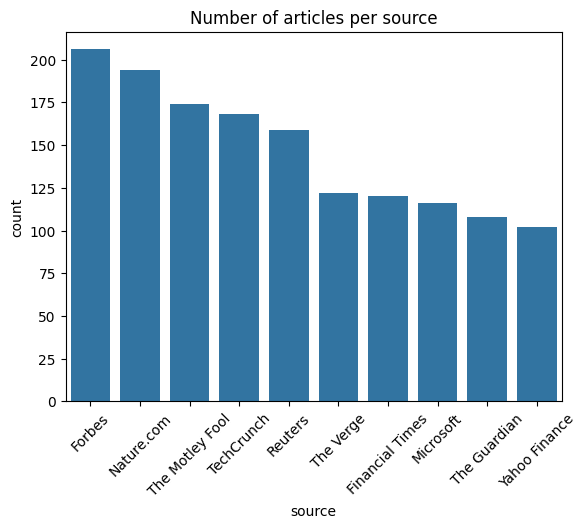

In [23]:
sns.countplot(x = 'source', data = top_10_df, order = top_10_sources)
plt.title('Number of articles per source')
plt.xticks(rotation=45)
plt.show()

In [24]:
df['category'].unique()

array(['Other', 'Career', 'Society', 'Education'], dtype=object)

<Axes: xlabel='category', ylabel='count'>

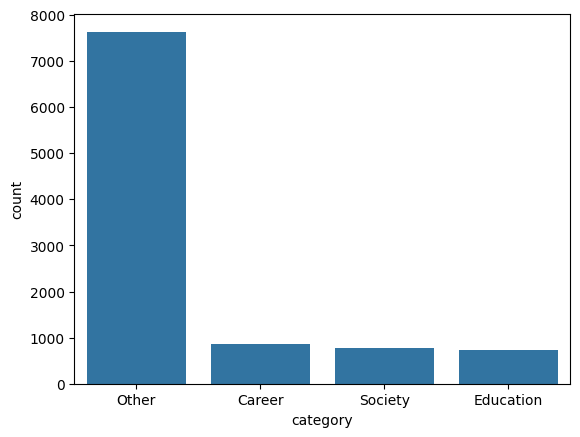

In [25]:
sns.barplot(df['category'].value_counts())

In [26]:
df['day_of_week'].value_counts()

,count
day_of_week,
Tuesday,1890
Thursday,1869
Wednesday,1806
Monday,1742
Friday,1654
Saturday,530
Sunday,509


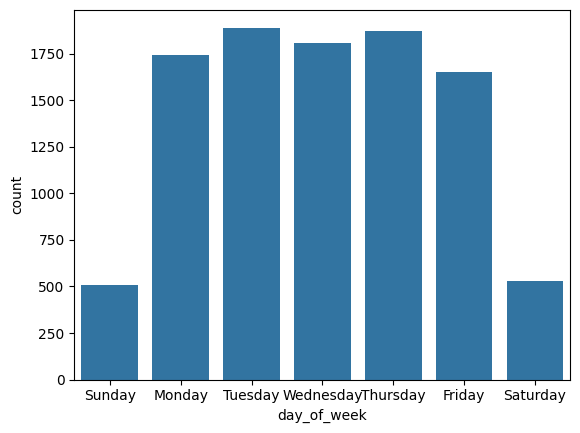

In [27]:
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sns.barplot(df['day_of_week'].value_counts(), order = order)
plt.show()

In [28]:
headlines_per_mon = df.resample('M', on = 'date').size()
headlines_per_mon

<ipython-input-28-cd35bbfbb7bf>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  headlines_per_mon = df.resample('M', on = 'date').size()


,0
date,
2023-11-30,379
2023-12-31,446
2024-01-31,653
2024-02-29,571
2024-03-31,579
2024-04-30,582
2024-05-31,647
2024-06-30,671
2024-07-31,801


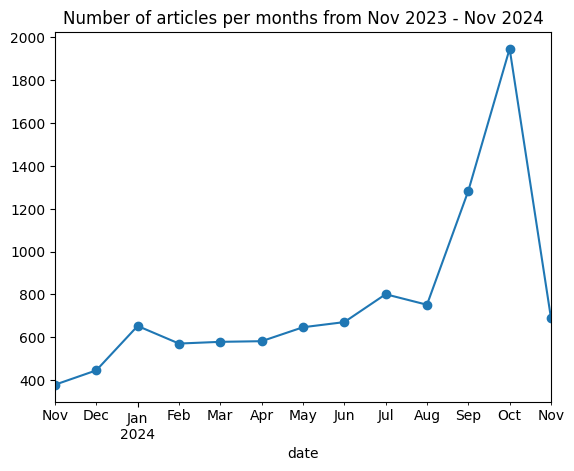

In [29]:
headlines_per_mon.plot(kind = 'line', marker = 'o')
plt.title('Number of articles per months from Nov 2023 - Nov 2024')
plt.show()

In [30]:
top_10_df['source'].value_counts()

,count
source,
Forbes,206
Nature.com,194
The Motley Fool,174
TechCrunch,168
Reuters,159
...,...
Global News Toronto,0
Global Railway Review,0
Global Times,0


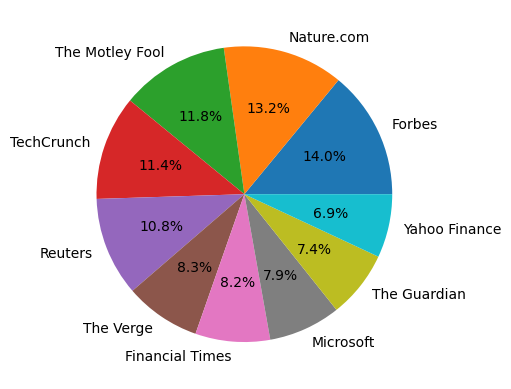

In [31]:
plt.pie(top_10_df['source'].value_counts().head(10), labels = top_10_df['source'].value_counts().head(10).index, autopct='%1.1f%%')
plt.show()

In [32]:
df['category'].value_counts()

,count
category,
Other,7635
Career,861
Society,767
Education,737


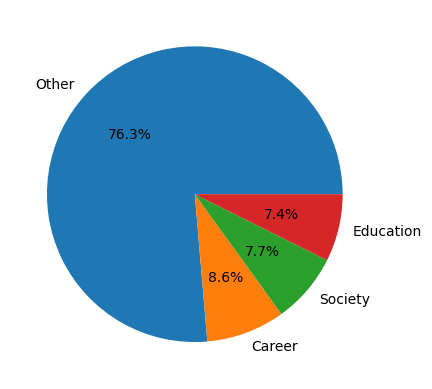

In [33]:
plt.pie(df['category'].value_counts(), labels = df['category'].value_counts().index, autopct = "%1.1f%%")
plt.show()

In [34]:
numeric_df = df.drop('Unnamed: 0', axis = 1).select_dtypes(['number'])
corr_mat = numeric_df.corr()
corr_mat

,number_of_characters_title,number_of_words_title,year,quarter
number_of_characters_title,1.000000,0.872519,0.012098,-0.008924
number_of_words_title,0.872519,1.000000,0.020815,0.011284
year,0.012098,0.020815,1.000000,-0.327610
quarter,-0.008924,0.011284,-0.327610,1.000000


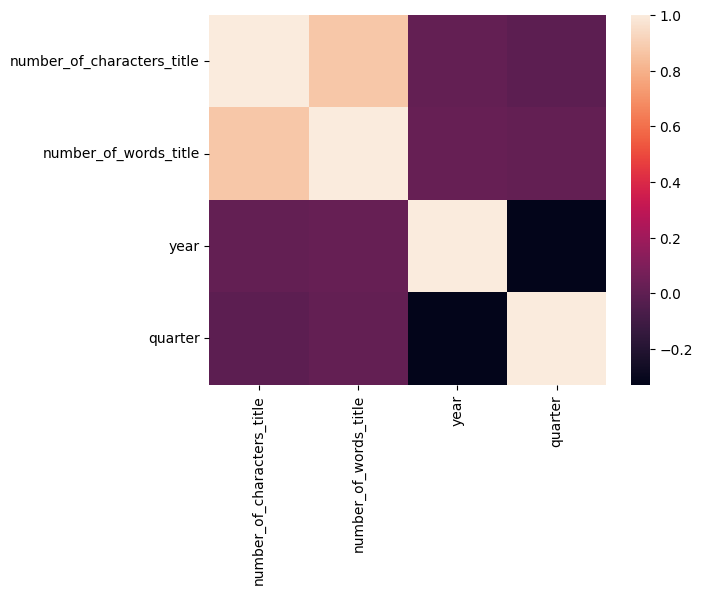

In [35]:
sns.heatmap(corr_mat)
plt.show()

In [36]:
df.groupby([df['date'].dt.to_period('Q'), 'category']).size()

date    category 
2023Q4  Career         61
        Education      58
        Other         633
        Society        73
2024Q1  Career        162
        Education     135
        Other        1346
        Society       160
2024Q2  Career        154
        Education     130
        Other        1483
        Society       133
2024Q3  Career        219
        Education     245
        Other        2159
        Society       213
2024Q4  Career        265
        Education     169
        Other        2014
        Society       188
dtype: int64

In [37]:
df.groupby([df['date'].dt.to_period('Q'), 'category']).size().unstack()

category,Career,Education,Other,Society
date,,,,
2023Q4,61,58,633,73
2024Q1,162,135,1346,160
2024Q2,154,130,1483,133
2024Q3,219,245,2159,213
2024Q4,265,169,2014,188


<Axes: xlabel='date'>

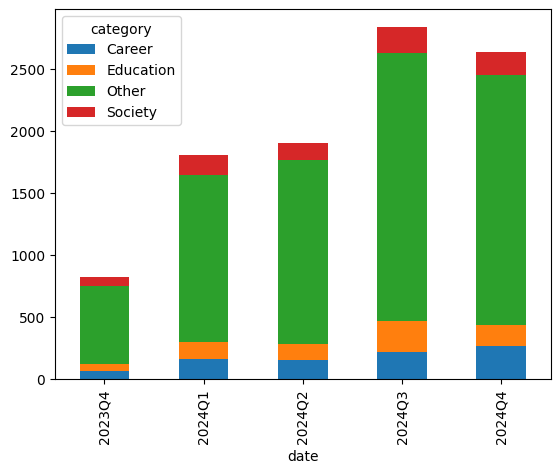

In [38]:
df.groupby([df['date'].dt.to_period('Q'), 'category']).size().unstack().plot(kind = 'bar', stacked = True)

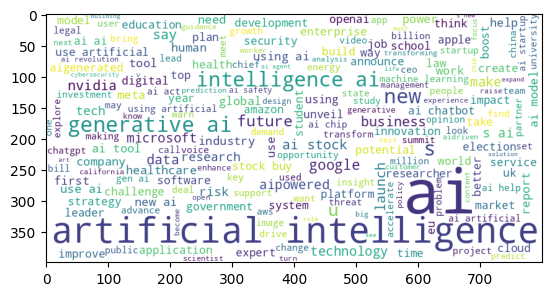

In [39]:
text = " ".join(title for title in df['title'])
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', colormap = 'viridis').generate(text)
plt.imshow(wordcloud)
plt.show()

### For number of characters in title

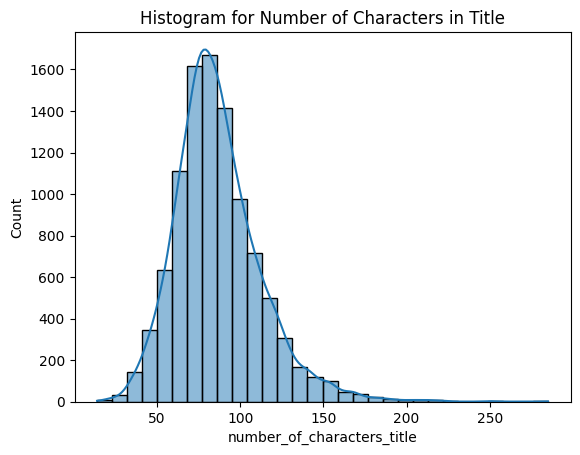

In [40]:
sns.histplot(df['number_of_characters_title'], bins = 30, kde = True)
plt.title('Histogram for Number of Characters in Title')
plt.show()

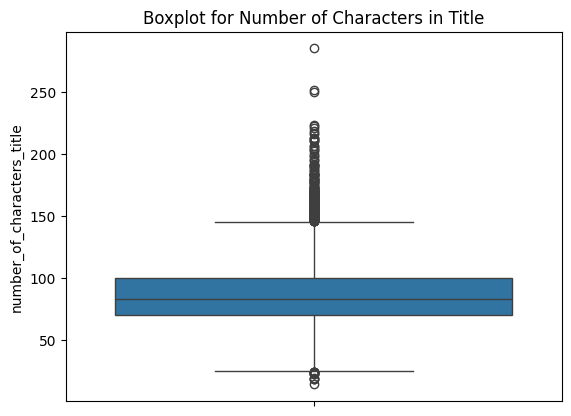

In [41]:
sns.boxplot(df['number_of_characters_title'])
plt.title('Boxplot for Number of Characters in Title')
plt.show()

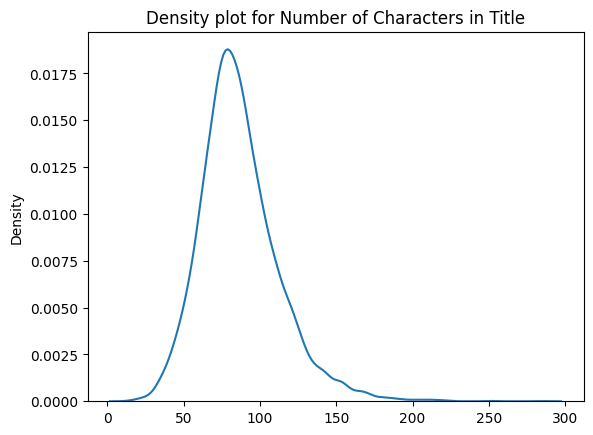

In [42]:
sns.kdeplot(np.array(df['number_of_characters_title']))
plt.title('Density plot for Number of Characters in Title')
plt.show()

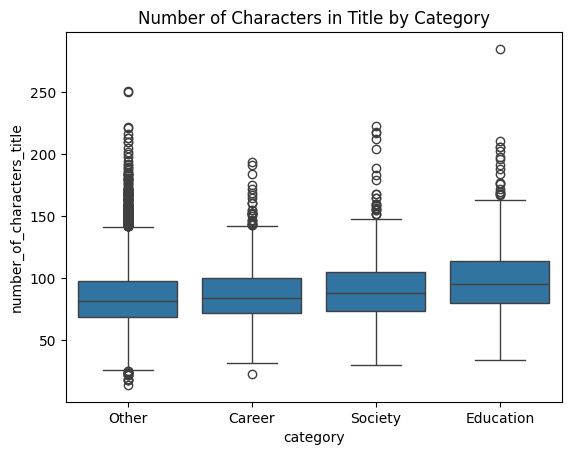

In [43]:
sns.boxplot(x = 'category', y = 'number_of_characters_title', data = df)
plt.title('Number of Characters in Title by Category')
plt.show()

### For number of words

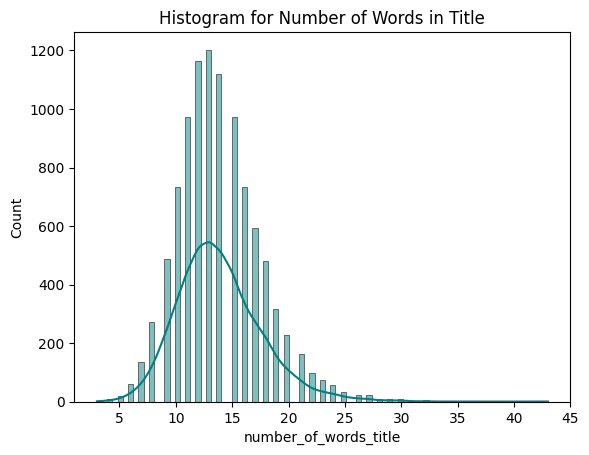

In [44]:
sns.histplot(df['number_of_words_title'], kde = True, color = 'teal')
plt.title('Histogram for Number of Words in Title')
plt.show()

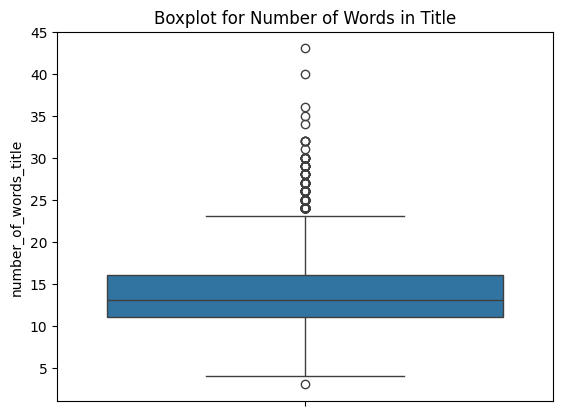

In [45]:
sns.boxplot(df['number_of_words_title'])
plt.title('Boxplot for Number of Words in Title')
plt.show()

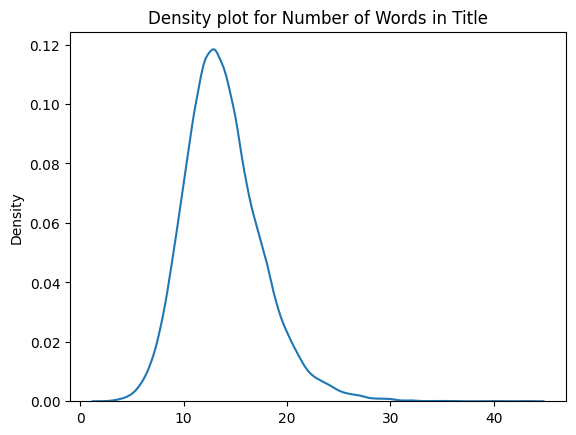

In [46]:
sns.kdeplot(np.array(df['number_of_words_title']))
plt.title('Density plot for Number of Words in Title')
plt.show()

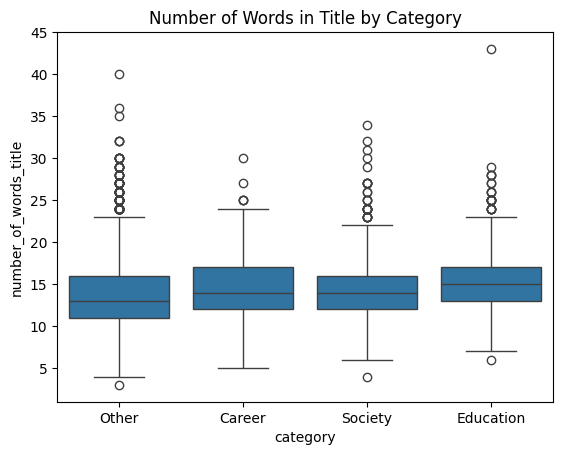

In [47]:
sns.boxplot(x = 'category', y = 'number_of_words_title', data = df)
plt.title('Number of Words in Title by Category')
plt.show()

# Sentiment Analysis

In [51]:
df['Sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Category_of_Sentiment'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Nuetral'))
df.head()

,Unnamed: 0,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category,named_entities,Sentiment,Category_of_Sentiment
0,0,2024-10-14,william fyilicia ai revolution inclusivity voi...,Evening Standard,122,20,Monday,October,2024,4,False,Other,"[(william fyilicia, PERSON), (daily, DATE)]",0.000,Nuetral
1,1,2024-02-21,intel launch world’s first system foundry desi...,Investor Relations :: Intel Corporation (INTC),117,18,Wednesday,February,2024,1,False,Other,"[(intel, ORG), (first, ORDINAL)]",0.250,Positive
2,2,2024-02-05,unique challenge selling enterprise ai,Emerge,54,9,Monday,February,2024,1,False,Career,[],0.375,Positive
3,3,2024-08-28,contentious california ai bill pass legislatur...,Reuters,88,11,Wednesday,August,2024,3,False,Other,"[(california, GPE)]",0.000,Nuetral
4,4,2024-10-15,exploring genius creation humanity age ai,University of Aberdeen,82,14,Tuesday,October,2024,4,False,Other,[],0.000,Nuetral


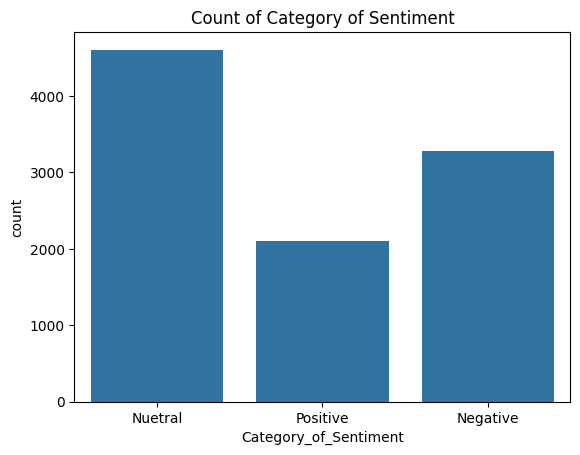

In [52]:
sns.countplot(data = df, x = 'Category_of_Sentiment')
plt.title('Count of Category of Sentiment')
plt.show()

In [53]:
lemmatized_words = []
for title in df['title']:
  tokens = title.split()
  tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
  lemmatized_words.extend(tokens)

In [54]:
word_counts = Counter(lemmatized_words)
word_counts

Counter({'william': 4,
         'fyilicia': 1,
         'ai': 7449,
         'revolution': 77,
         'inclusivity': 2,
         'voice': 60,
         'uk': 94,
         'tech': 209,
         'science': 73,
         'daily': 11,
         'podcast': 23,
         'intel': 22,
         'launch': 221,
         'world’s': 25,
         'first': 149,
         'system': 120,
         'foundry': 6,
         'designed': 10,
         'era': 77,
         'unique': 12,
         'challenge': 106,
         'selling': 12,
         'enterprise': 82,
         'contentious': 3,
         'california': 56,
         'bill': 91,
         'pas': 11,
         'legislature': 5,
         'awaits': 1,
         'governor': 17,
         'signature': 3,
         'exploring': 25,
         'genius': 3,
         'creation': 13,
         'humanity': 40,
         'age': 69,
         'conversational': 7,
         'improves': 11,
         'fourth': 2,
         'trimester': 1,
         'maternal': 3,
         'care': 83,


In [55]:
word_counts_top_10_most_common = Counter(lemmatized_words).most_common(10)
word_counts_top_10_most_common

[('ai', 7449),
 ('intelligence', 2743),
 ('artificial', 2710),
 ('new', 718),
 ('generative', 567),
 ('use', 343),
 ('2024', 338),
 ('u', 329),
 ('stock', 322),
 ('data', 310)]

In [56]:
temp = pd.DataFrame(word_counts_top_10_most_common, columns = ['Words', 'Word_Count'])
temp

,Words,Word_Count
0,ai,7449
1,intelligence,2743
2,artificial,2710
3,new,718
4,generative,567
5,use,343
6,2024,338
7,u,329
8,stock,322
9,data,310


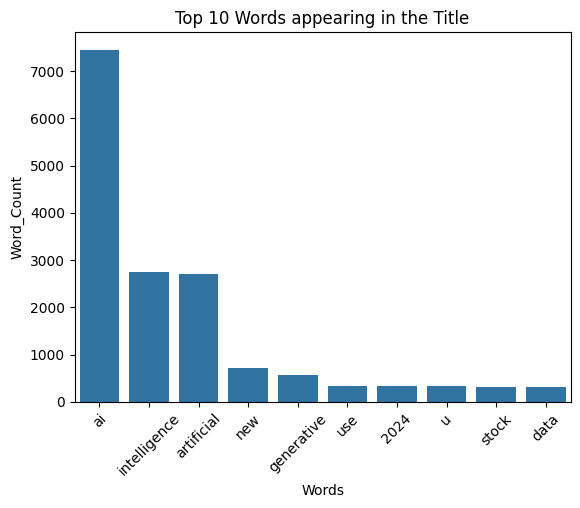

In [57]:
sns.barplot(x = 'Words', y = 'Word_Count', data = temp)
plt.title('Top 10 Words appearing in the Title')
plt.xticks(rotation = 45)
plt.show()

In [58]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['title'])
feature_names = tfidf_vectorizer.get_feature_names_out()

In [59]:
feature_names

array(['05', '0day', '10', ..., 'école', 'ōtaki', 'αsynuclein'],
      dtype=object)

In [60]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
temp_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns = feature_names)
temp_tfidf

,05,0day,10,100,1000,10000,100b,100bn,100m,100x,...,zoho,zone,zoom,zt,zte,zuckerberg,zurich,école,ōtaki,αsynuclein
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
top_terms = temp_tfidf.apply(lambda x: x.nlargest(10).index.tolist(), axis = 1)

In [83]:
pd.set_option('display.max_colwidth', None)
top_terms

,0
0,"[fyilicia, inclusivity, william, daily, podcast, voice, science, revolution, uk, tech]"
1,"[foundry, designed, intel, era, system, world, first, launch, ai, 05]"
2,"[selling, unique, enterprise, challenge, ai, 05, 0day, 10, 100, 1000]"
3,"[awaits, contentious, signature, legislature, pass, governor, california, bill, ai, 05]"
4,"[genius, creation, exploring, humanity, age, ai, 05, 0day, 10, 100]"
...,...
9995,"[parliament, approves, landmark, act, eu, artificial, intelligence, 05, 0day, 10]"
9996,"[eustyle, current, short, avoid, fall, regulatory, framework, regulation, study, uk]"
9997,"[mckinsey, tap, trillion, value, cloud, company, business, help, google, generative]"
9998,"[young, keep, getting, worker, skill, need, could, ai, 05, 0day]"


In [64]:
top_terms[0]

['fyilicia',
 'inclusivity',
 'william',
 'daily',
 'podcast',
 'voice',
 'science',
 'revolution',
 'uk',
 'tech']

In [65]:
top_terms_df = pd.DataFrame(top_terms, columns = ['top_10_words_in_each_title'])
top_terms_df

,top_10_words_in_each_title
0,"[fyilicia, inclusivity, william, daily, podcast, voice, science, revolution, uk, tech]"
1,"[foundry, designed, intel, era, system, world, first, launch, ai, 05]"
2,"[selling, unique, enterprise, challenge, ai, 05, 0day, 10, 100, 1000]"
3,"[awaits, contentious, signature, legislature, pass, governor, california, bill, ai, 05]"
4,"[genius, creation, exploring, humanity, age, ai, 05, 0day, 10, 100]"
...,...
9995,"[parliament, approves, landmark, act, eu, artificial, intelligence, 05, 0day, 10]"
9996,"[eustyle, current, short, avoid, fall, regulatory, framework, regulation, study, uk]"
9997,"[mckinsey, tap, trillion, value, cloud, company, business, help, google, generative]"
9998,"[young, keep, getting, worker, skill, need, could, ai, 05, 0day]"


In [67]:
scores_tfidf = []

for index, row in top_terms_df['top_10_words_in_each_title'].items():
  scores = temp_tfidf.loc[index, row].values
  scores_tfidf.append(scores)

In [79]:
scores_tfidf

[array([0.41782202, 0.40002156, 0.37759562, 0.33916136, 0.30873126,
        0.26777921, 0.25989516, 0.25425905, 0.24652015, 0.21086998]),
 array([0.46162433, 0.43637821, 0.38833073, 0.32485852, 0.30198143,
        0.29469485, 0.29081439, 0.26854283, 0.0736011 , 0.        ]),
 array([0.56540096, 0.56540096, 0.4283016 , 0.40951861, 0.09744621,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.42588775, 0.39487022, 0.39487022, 0.37672613, 0.3457086 ,
        0.32514507, 0.26615533, 0.25554405, 0.05896516, 0.        ]),
 array([0.54410269, 0.4668565 , 0.42868613, 0.40060121, 0.36761749,
        0.08124974, 0.        , 0.        , 0.        , 0.        ]),
 array([0.41862228, 0.3881339 , 0.3881339 , 0.36351895, 0.35764552,
        0.33981096, 0.28367264, 0.25318426, 0.05795924, 0.        ]),
 array([0.48905703, 0.45716168, 0.41866289, 0.38591609, 0.36600521,
        0.29593355, 0.07797495, 0.        , 0.        , 0.        ]),
 array([0.5761823 , 0.55163521, 0.

In [89]:
scores_df = pd.DataFrame(scores_tfidf)
scores_df

,0,1,2,3,4,5,6,7,8,9
0,0.417822,0.400022,0.377596,0.339161,0.308731,0.267779,0.259895,0.254259,0.246520,0.210870
1,0.461624,0.436378,0.388331,0.324859,0.301981,0.294695,0.290814,0.268543,0.073601,0.000000
2,0.565401,0.565401,0.428302,0.409519,0.097446,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.425888,0.394870,0.394870,0.376726,0.345709,0.325145,0.266155,0.255544,0.058965,0.000000
4,0.544103,0.466856,0.428686,0.400601,0.367617,0.081250,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
9995,0.528219,0.485650,0.449552,0.351397,0.346111,0.141175,0.140816,0.000000,0.000000,0.000000
9996,0.416474,0.350656,0.334564,0.331321,0.313578,0.293800,0.291225,0.250384,0.246169,0.245725
9997,0.457376,0.378589,0.378589,0.336006,0.300799,0.266227,0.253091,0.248293,0.238424,0.205987
9998,0.481945,0.405425,0.397080,0.368470,0.366137,0.306834,0.275334,0.076841,0.000000,0.000000


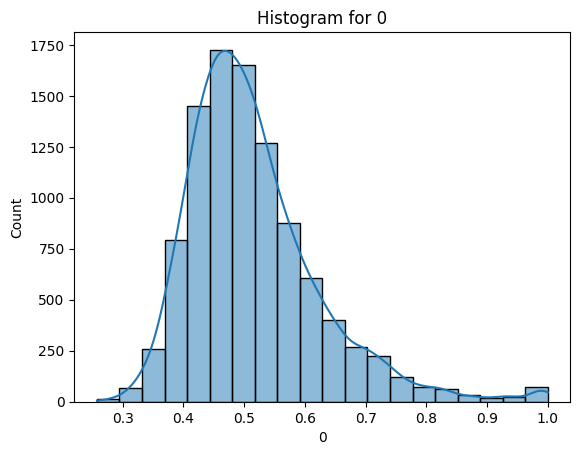

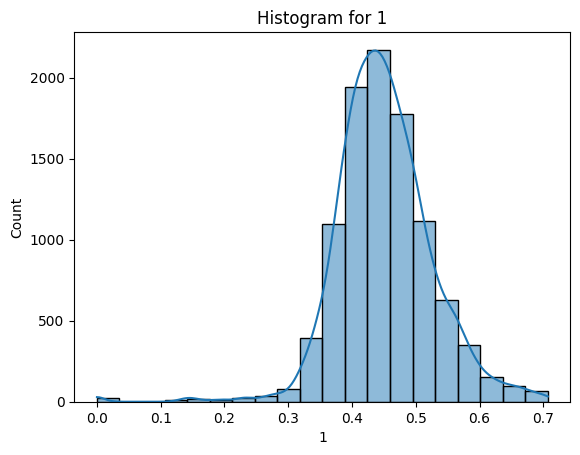

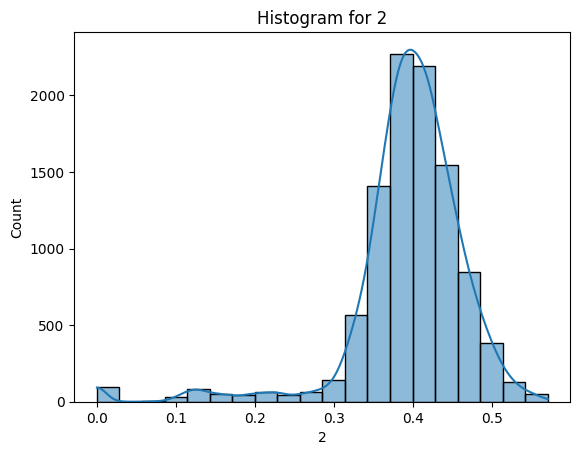

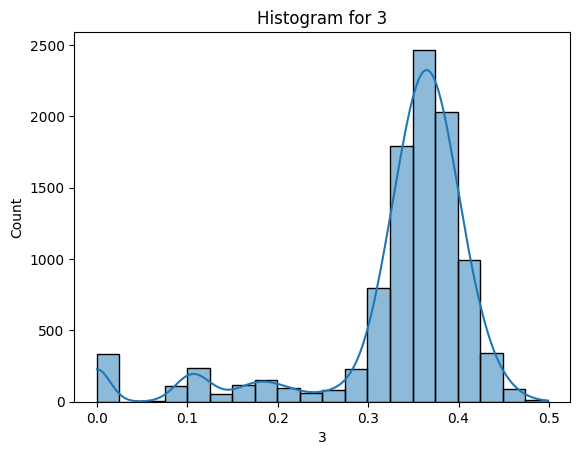

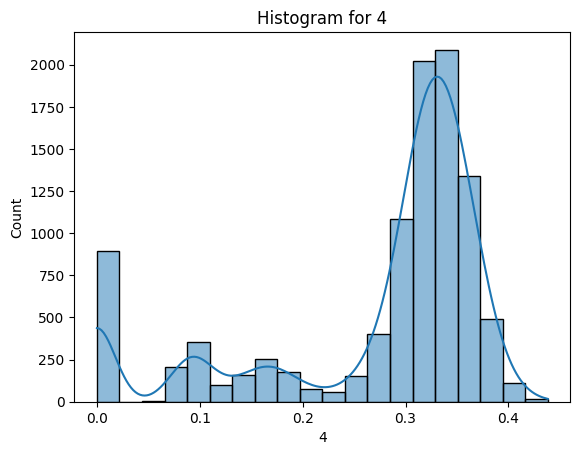

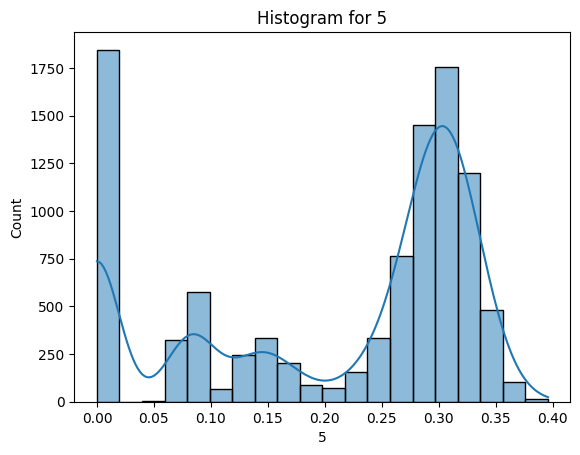

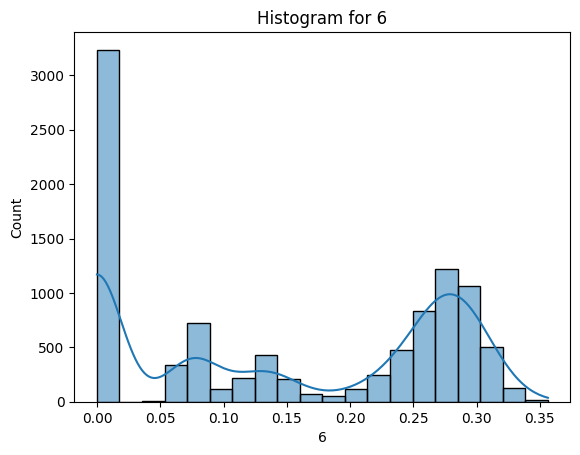

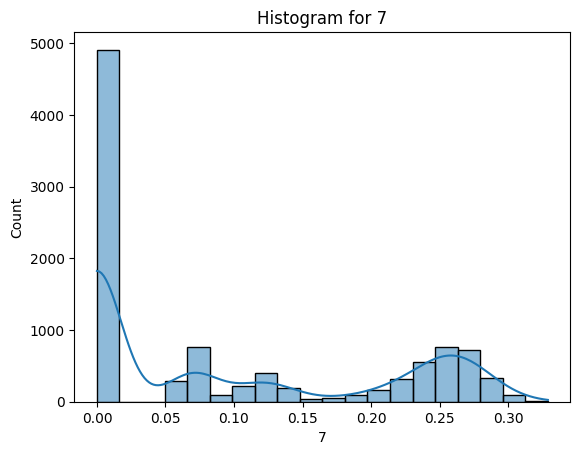

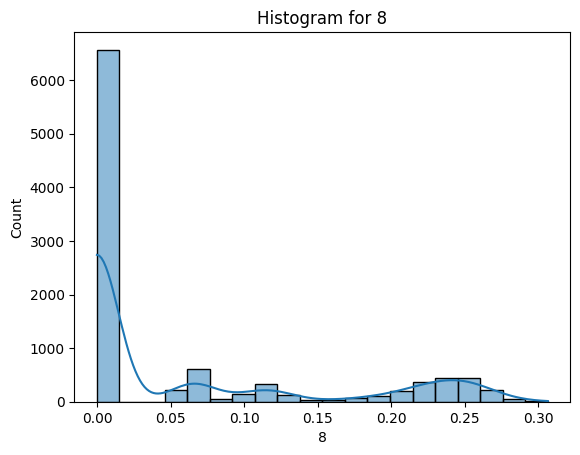

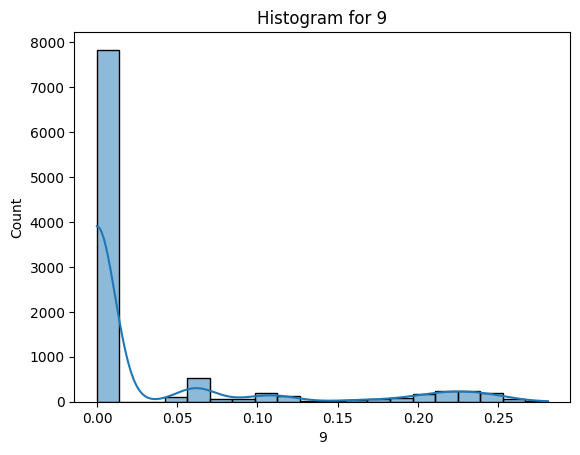

In [93]:
for col in scores_df.columns:
  sns.histplot(scores_df[col], bins = 20, kde = True)
  plt.title(f"Histogram for {col}")
  plt.show()

In [95]:
word_score_pairs = [(word, score) for i, row in scores_df.iterrows() for word, score in zip(scores_df.columns, row)]
word_score_pairs

[(0, 0.41782202219702325),
 (1, 0.4000215564467531),
 (2, 0.37759562178955636),
 (3, 0.33916136206394965),
 (4, 0.30873126487254793),
 (5, 0.2677792057897113),
 (6, 0.2598951564639808),
 (7, 0.2542590498935197),
 (8, 0.2465201531229401),
 (9, 0.21086997725345422),
 (0, 0.46162432911774226),
 (1, 0.4363782081625974),
 (2, 0.3883307303877829),
 (3, 0.32485851835990615),
 (4, 0.3019814347278776),
 (5, 0.2946948466823341),
 (6, 0.2908143916961218),
 (7, 0.26854283353495967),
 (8, 0.07360109816361782),
 (9, 0.0),
 (0, 0.5654009563106633),
 (1, 0.5654009563106633),
 (2, 0.42830160134040474),
 (3, 0.409518610677085),
 (4, 0.09744620569488428),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (0, 0.4258877468503438),
 (1, 0.3948702206291628),
 (2, 0.3948702206291628),
 (3, 0.3767261309246367),
 (4, 0.34570860470345566),
 (5, 0.3251450700376121),
 (6, 0.26615533053865587),
 (7, 0.25554404943206394),
 (8, 0.05896515896520157),
 (9, 0.0),
 (0, 0.544102694930498),
 (1, 0.4668564994555978),


In [100]:
word_score_dict = dict(word_score_pairs)
word_score_dict = {str(key) : value for key, value in word_score_dict.items()}
word_score_dict

{'0': 0.3864349087637093,
 '1': 0.3864349087637093,
 '2': 0.3647706662409484,
 '3': 0.3448376947202756,
 '4': 0.33133199230001004,
 '5': 0.3154411493533626,
 '6': 0.3128700439726279,
 '7': 0.24825821934493492,
 '8': 0.2314263813723198,
 '9': 0.15453310995954292}

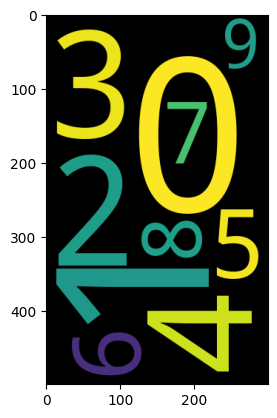

In [101]:
wordcloud = WordCloud(width = 300, height = 500).generate_from_frequencies(word_score_dict)
plt.imshow(wordcloud)
plt.show()

In [ ]:
# topn =
# temp1 = temp_tfidf.apply(np.sort, axis=1).apply(lambda x: x[:topn]).apply(pd.Series)

In [ ]:
# temp1